# load package

In [1]:
%pylab
from astropy.table import Table

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from scipy.optimize import curve_fit

In [4]:
from scipy.special import erf

In [5]:
import emcee

In [5]:
import seaborn as sns
sns.set(font_scale=2)
# sns.set(rc={'figure.figsize':(15.7,9.27)})
sns.set_style("ticks")

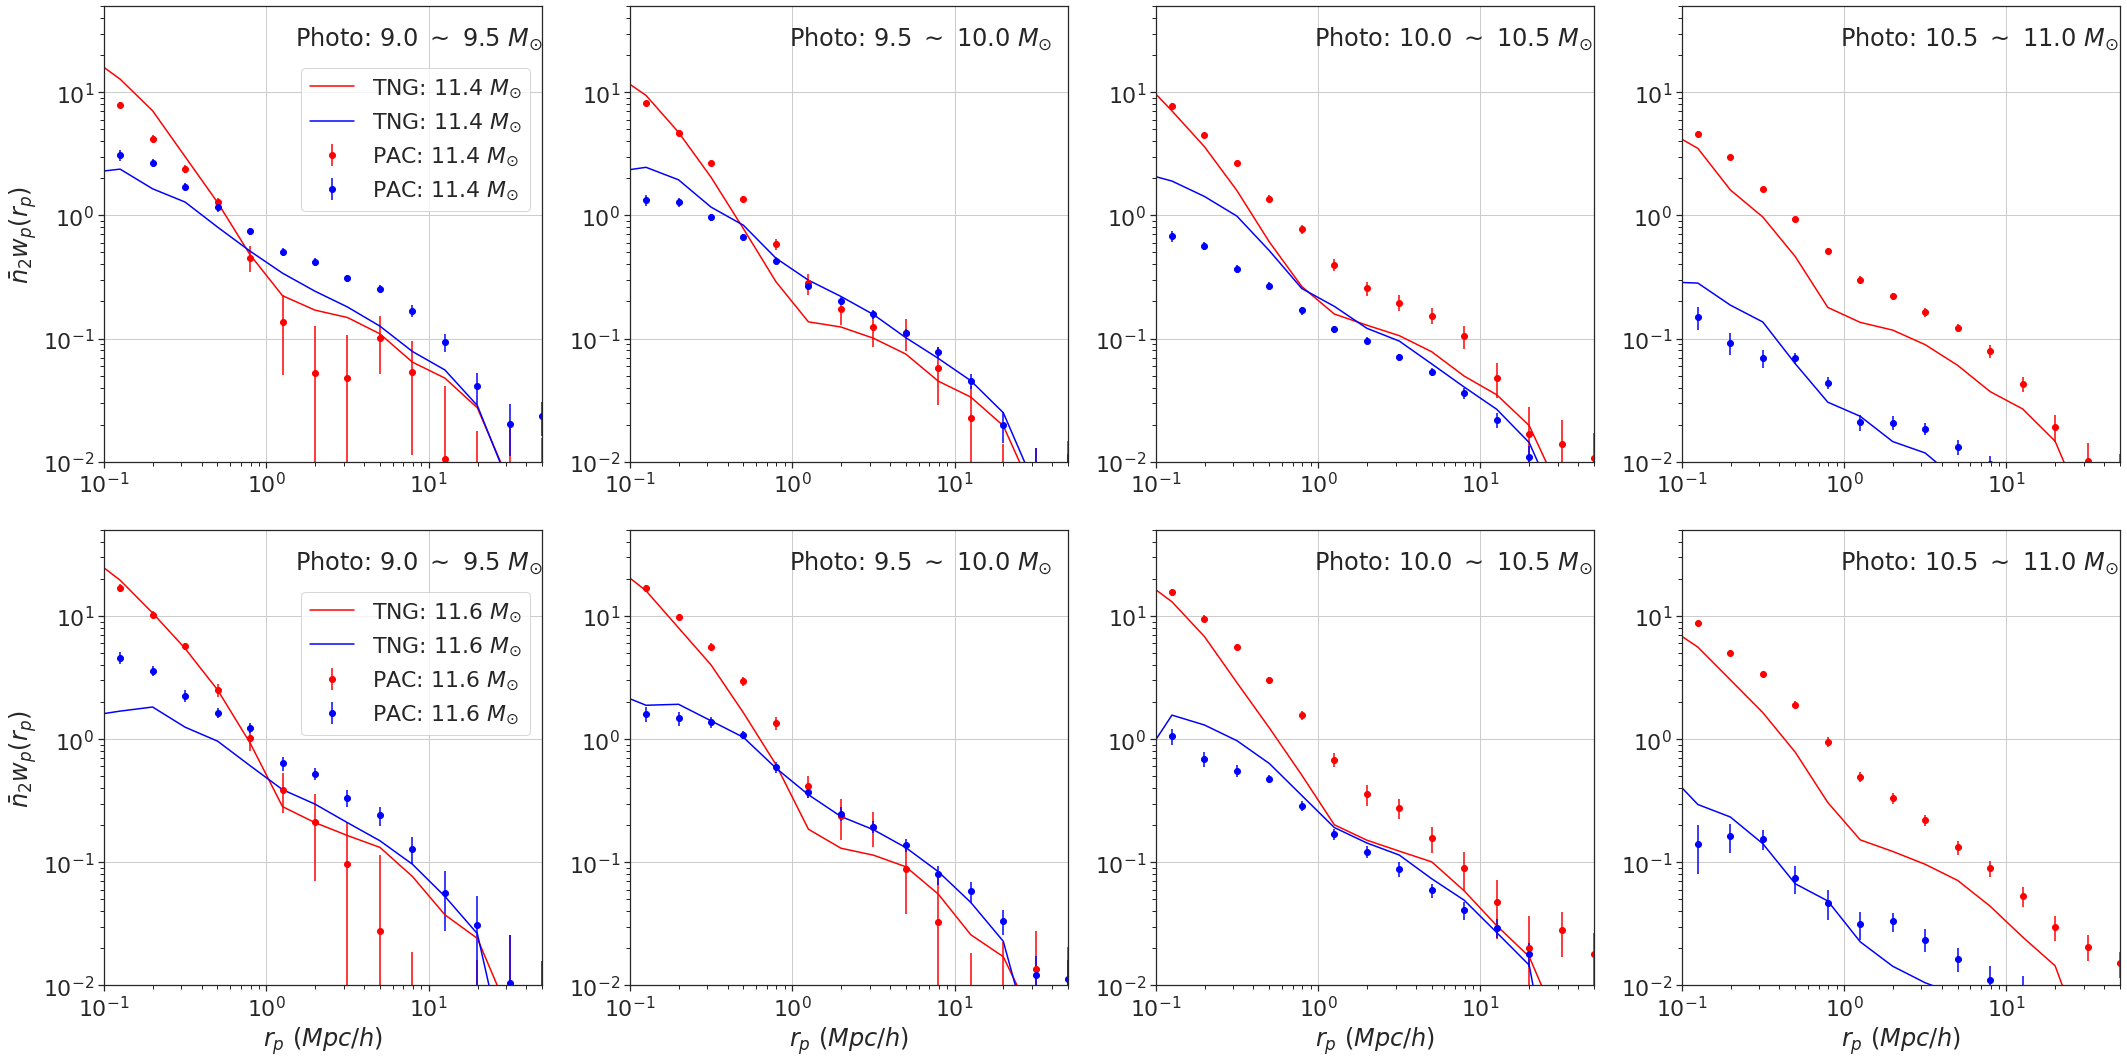

In [11]:
#plt.figure(figsize=(16,10))
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
ml = [9.0,9.5,10.0,10.5]
r = np.logspace(-2, 2, 21)
# r = r[4:]
r_need = 10**((np.log10(r[1:])+np.log10(r[:-1]))/2.0)

ms = [11.3,11.5] 
# off = [0.95,1,1.05]
fig, axs = plt.subplots(2,4,figsize=(32,16))
fig.subplots_adjust(top=0.95,
bottom=0.1,
left=0.085,
right=0.96,
hspace=0.15,
wspace=0.2)


k = 0
for i in range(len(ms)):
    for j in range(len(ml)):
        k = k+1
        plt.subplot(2,4,k)
        
        
        TNG_red = np.load("/home/yunzheng/PAC_final/PAC/0_0.2/TNG/color_cut_red/nwp_%.1f_%.1f.npy"%(ms[i],ml[j]))
        plt.plot(r_need,TNG_red[0],label = 'TNG: %.1f $M_{\odot}$'% (ms[i]+0.1),color='red')
#         plt.fill_between(r_need,TNG_red[0]-TNG_red[1],TNG_red[0]+TNG_red[1],color='red',alpha = 0.2)
        
        TNG_blue = np.load("/home/yunzheng/PAC_final/PAC/0_0.2/TNG/color_cut_blue/nwp_%.1f_%.1f.npy"%(ms[i],ml[j]))
        plt.plot(r_need,TNG_blue[0],label = 'TNG: %.1f $M_{\odot}$'% (0.1+ms[i]),color='blue')
#         plt.fill_between(r_need,TNG_blue[0]-TNG_blue[1],TNG_blue[0]+TNG_blue[1],color='blue',alpha = 0.2)

        if j==0:
            
            data_red = np.load('./color_cut_red_2bins/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
            plt.errorbar(data_red[0],data_red[1],data_red[2],fmt='o',label='PAC: %.1f $M_{\odot}$' % (ms[i]+0.1),color='red')

            data_blue = np.load('./color_cut_blue_2bins/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
            plt.errorbar(data_blue[0],data_blue[1],data_blue[2],fmt='o',label='PAC: %.1f $M_{\odot}$' % (ms[i]+0.1),color='blue')
            
            plt.ylabel('$\\bar{n}_2w_{p}(r_p)$')
            plt.text(1.5,24,'Photo: %.1f $\sim$ %.1f $M_{\odot}$' % (ml[j],ml[j]+0.5))

            plt.legend(loc=(0.45,0.55))
                
        
#         elif j==3:
#             data_red = np.load('./color_cut_red_cor/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
#             plt.errorbar(data_red[0],data_red[1],data_red[2],fmt='o',label='PAC:(%.1f)' % (ms[i]+0.1),color='red')

#             data_blue = np.load('./color_cut_blue_cor/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
#             plt.errorbar(data_blue[0],data_blue[1],data_blue[2],fmt='o',label='PAC:(%.1f)' % (ms[i]+0.1),color='blue')
            
            
            
        else:
            data_red = np.load('./color_cut_red/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
            plt.errorbar(data_red[0],data_red[1],data_red[2],fmt='o',label='PAC: %.1f' % (ms[i]+0.1),color='red')

            data_blue = np.load('./color_cut_blue/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
            plt.errorbar(data_blue[0],data_blue[1],data_blue[2],fmt='o',label='PAC: %.1f' % (ms[i]+0.1),color='blue')
            plt.text(0.95,24,'Photo: %.1f $\sim$ %.1f $M_{\odot}$' % (ml[j],ml[j]+0.5))

        if i==1:    
            plt.xlabel('$r_p\ (Mpc/h)$')



        plt.xscale('log')
        plt.yscale('log')
#         plt.text(0.93,24,'Photo: %.1f $\sim$ %.1f $M_{\odot}$' % (ml[j],ml[j]+0.5))


        plt.ylim(0.01,50)
        plt.xlim(0.1,50)
        plt.grid()
# plt.suptitle("$color cut\ : \ z=0.1\ (2\ bins)$")
# plt.savefig("/home/yunzheng/PAC_newtry/picture//0_0.2/color_distribution.pdf",dpi = 100)

# red fraction

## 3bins

In [6]:
m_sate = [9.0,9.5,10.0,10.5]
m_cen = [11.4,11.6]
#m_sate = np.linspace(9.0,11.7,28)
r = np.logspace(-2, 2, 21)
r = r[4:]
r_need = 10**((np.log10(r[1:])+np.log10(r[:-1]))/2.0)

jack=50
zs = ['0p075','0p125','0p175']

number = np.zeros((2,4,50,16))
number_red = np.zeros((2,4,50,16))
for i in range(len(m_cen)):
    for j in range(len(m_sate)):
        
        pcf = np.zeros((jack,len(r_need)))
        para1 = 0
        
        pcf_red = np.zeros((jack,len(r_need)))
        para_red1 = 0
        for k in range(len(zs)):
            data = np.load('./SDSS_PAC/%s_%.1f_%.1f_results_jack.npy' % (zs[k],m_cen[i],m_sate[j]))
            para = np.load('./SDSS_PAC/%s_%.1f_%.1f_param_jack.npy' % (zs[k],m_cen[i],m_sate[j]))

            pcf += (data * para)
            para1 += para
            print("The length of para:",(para,para1))
    
            
            data_red = np.load('./color_cut_red/%s_%.1f_%.1f_results_jack.npy' % (zs[k],m_cen[i],m_sate[j]))
            para_red = np.load('./color_cut_red/%s_%.1f_%.1f_param_jack.npy' % (zs[k],m_cen[i],m_sate[j]))
            
            pcf_red += (data_red * para_red)
            para_red1 += para_red
            print("The length of para_red:",(para_red,para_red1))
        pcf = pcf/para1
        pcf_red = pcf_red/para_red1
        
        pcf_mean = np.mean((pcf_red/pcf),axis=0)
        pcf_std = np.sqrt(jack-1)*np.std((pcf_red/pcf),axis=0)
        np.save('./normal_fra_red_cor/%.1f_%.1f.npy' % (m_cen[i],m_sate[j]),np.array([r_need,pcf_mean,pcf_std]))

The length of para: (array([1153]), array([1153]))
The length of para_red: (array([1153]), array([1153]))
The length of para: (array([3197]), array([4350]))
The length of para_red: (array([3197]), array([4350]))
The length of para: (array([4895]), array([9245]))
The length of para_red: (array([4895]), array([9245]))
The length of para: (array([1153]), array([1153]))
The length of para_red: (array([1153]), array([1153]))
The length of para: (array([3197]), array([4350]))
The length of para_red: (array([3197]), array([4350]))
The length of para: (array([4895]), array([9245]))
The length of para_red: (array([4895]), array([9245]))
The length of para: (array([1153]), array([1153]))
The length of para_red: (array([1153]), array([1153]))
The length of para: (array([3197]), array([4350]))
The length of para_red: (array([3197]), array([4350]))
The length of para: (array([4895]), array([9245]))
The length of para_red: (array([4895]), array([9245]))
The length of para: (array([1153]), array([115

In [7]:
m_sate = [9.0,9.5,10.0,10.5]
m_cen = [11.4,11.6]
#m_sate = np.linspace(9.0,11.7,28)
r = np.logspace(-2, 2, 21)
r = r[4:]
r_need = 10**((np.log10(r[1:])+np.log10(r[:-1]))/2.0)

jack=50
zs = ['0p075','0p125','0p175']

number = np.zeros((2,4,50,16))
number_red = np.zeros((2,4,50,16))
for i in range(len(m_cen)):
    for j in range(len(m_sate)):
        
        pcf = np.zeros((jack,len(r_need)))
        para1 = 0
        
        pcf_red = np.zeros((jack,len(r_need)))
        para_red1 = 0
        for k in range(len(zs)):
            data = np.load('./SDSS_PAC/%s_%.1f_%.1f_results_jack.npy' % (zs[k],m_cen[i],m_sate[j]))
            para = np.load('./SDSS_PAC/%s_%.1f_%.1f_param_jack.npy' % (zs[k],m_cen[i],m_sate[j]))

            pcf += (data * para)
            para1 += para
            print("The length of para:",(para,para1))
    
            
            data_red = np.load('./color_cut_blue/%s_%.1f_%.1f_results_jack.npy' % (zs[k],m_cen[i],m_sate[j]))
            para_red = np.load('./color_cut_blue/%s_%.1f_%.1f_param_jack.npy' % (zs[k],m_cen[i],m_sate[j]))
            
            pcf_red += (data_red * para_red)
            para_red1 += para_red
            print("The length of para_red:",(para_red,para_red1))
        pcf = pcf/para1
        pcf_red = pcf_red/para_red1
        
        pcf_mean = np.mean((pcf_red/pcf),axis=0)
        pcf_std = np.sqrt(jack-1)*np.std((pcf_red/pcf),axis=0)
        np.save('./normal_fra_blue_cor/%.1f_%.1f.npy' % (m_cen[i],m_sate[j]),np.array([r_need,pcf_mean,pcf_std]))

The length of para: (array([1153]), array([1153]))
The length of para_red: (array([1153]), array([1153]))
The length of para: (array([3197]), array([4350]))
The length of para_red: (array([3197]), array([4350]))
The length of para: (array([4895]), array([9245]))
The length of para_red: (array([4895]), array([9245]))
The length of para: (array([1153]), array([1153]))
The length of para_red: (array([1153]), array([1153]))
The length of para: (array([3197]), array([4350]))
The length of para_red: (array([3197]), array([4350]))
The length of para: (array([4895]), array([9245]))
The length of para_red: (array([4895]), array([9245]))
The length of para: (array([1153]), array([1153]))
The length of para_red: (array([1153]), array([1153]))
The length of para: (array([3197]), array([4350]))
The length of para_red: (array([3197]), array([4350]))
The length of para: (array([4895]), array([9245]))
The length of para_red: (array([4895]), array([9245]))
The length of para: (array([1153]), array([115

## 2bins

In [8]:
m_sate = [9.0,9.5,10.0,10.5]
m_cen = [11.4,11.6]
#m_sate = np.linspace(9.0,11.7,28)
r = np.logspace(-2, 2, 21)
r = r[4:]
r_need = 10**((np.log10(r[1:])+np.log10(r[:-1]))/2.0)

jack=50
zs = ['0p075','0p125']

number = np.zeros((2,4,50,16))
number_red = np.zeros((2,4,50,16))
for i in range(len(m_cen)):
    for j in range(len(m_sate)):
        
        pcf = np.zeros((jack,len(r_need)))
        para1 = 0
        
        pcf_red = np.zeros((jack,len(r_need)))
        para_red1 = 0
        for k in range(len(zs)):
            data = np.load('./SDSS_PAC/%s_%.1f_%.1f_results_jack.npy' % (zs[k],m_cen[i],m_sate[j]))
            para = np.load('./SDSS_PAC/%s_%.1f_%.1f_param_jack.npy' % (zs[k],m_cen[i],m_sate[j]))

            pcf += (data * para)
            para1 += para
            print("The length of para:",(para,para1))
    
            
            data_red = np.load('./color_cut_red/%s_%.1f_%.1f_results_jack.npy' % (zs[k],m_cen[i],m_sate[j]))
            para_red = np.load('./color_cut_red/%s_%.1f_%.1f_param_jack.npy' % (zs[k],m_cen[i],m_sate[j]))
            
            pcf_red += (data_red * para_red)
            para_red1 += para_red
            print("The length of para_red:",(para_red,para_red1))
        pcf = pcf/para1
        pcf_red = pcf_red/para_red1
        
        pcf_mean = np.mean((pcf_red/pcf),axis=0)
        pcf_std = np.sqrt(jack-1)*np.std((pcf_red/pcf),axis=0)
        np.save('./normal_fra_red_new_cor/%.1f_%.1f.npy' % (m_cen[i],m_sate[j]),np.array([r_need,pcf_mean,pcf_std]))

The length of para: (array([1153]), array([1153]))
The length of para_red: (array([1153]), array([1153]))
The length of para: (array([3197]), array([4350]))
The length of para_red: (array([3197]), array([4350]))
The length of para: (array([1153]), array([1153]))
The length of para_red: (array([1153]), array([1153]))
The length of para: (array([3197]), array([4350]))
The length of para_red: (array([3197]), array([4350]))
The length of para: (array([1153]), array([1153]))
The length of para_red: (array([1153]), array([1153]))
The length of para: (array([3197]), array([4350]))
The length of para_red: (array([3197]), array([4350]))
The length of para: (array([1153]), array([1153]))
The length of para_red: (array([1153]), array([1153]))
The length of para: (array([3197]), array([4350]))
The length of para_red: (array([3197]), array([4350]))
The length of para: (array([190]), array([190]))
The length of para_red: (array([190]), array([190]))
The length of para: (array([653]), array([843]))
T

In [9]:
m_sate = [9.0,9.5,10.0,10.5]
m_cen = [11.4,11.6]
#m_sate = np.linspace(9.0,11.7,28)
r = np.logspace(-2, 2, 21)
r = r[4:]
r_need = 10**((np.log10(r[1:])+np.log10(r[:-1]))/2.0)

jack=50
zs = ['0p075','0p125']

number = np.zeros((2,4,50,16))
number_red = np.zeros((2,4,50,16))
for i in range(len(m_cen)):
    for j in range(len(m_sate)):
        
        pcf = np.zeros((jack,len(r_need)))
        para1 = 0
        
        pcf_red = np.zeros((jack,len(r_need)))
        para_red1 = 0
        for k in range(len(zs)):
            data = np.load('./SDSS_PAC/%s_%.1f_%.1f_results_jack.npy' % (zs[k],m_cen[i],m_sate[j]))
            para = np.load('./SDSS_PAC/%s_%.1f_%.1f_param_jack.npy' % (zs[k],m_cen[i],m_sate[j]))

            pcf += (data * para)
            para1 += para
            print("The length of para:",(para,para1))
    
            
            data_red = np.load('./color_cut_blue/%s_%.1f_%.1f_results_jack.npy' % (zs[k],m_cen[i],m_sate[j]))
            para_red = np.load('./color_cut_blue/%s_%.1f_%.1f_param_jack.npy' % (zs[k],m_cen[i],m_sate[j]))
            
            pcf_red += (data_red * para_red)
            para_red1 += para_red
            print("The length of para_red:",(para_red,para_red1))
        pcf = pcf/para1
        pcf_red = pcf_red/para_red1
        
        pcf_mean = np.mean((pcf_red/pcf),axis=0)
        pcf_std = np.sqrt(jack-1)*np.std((pcf_red/pcf),axis=0)
        np.save('./normal_fra_blue_new_cor/%.1f_%.1f.npy' % (m_cen[i],m_sate[j]),np.array([r_need,pcf_mean,pcf_std]))

The length of para: (array([1153]), array([1153]))
The length of para_red: (array([1153]), array([1153]))
The length of para: (array([3197]), array([4350]))
The length of para_red: (array([3197]), array([4350]))
The length of para: (array([1153]), array([1153]))
The length of para_red: (array([1153]), array([1153]))
The length of para: (array([3197]), array([4350]))
The length of para_red: (array([3197]), array([4350]))
The length of para: (array([1153]), array([1153]))
The length of para_red: (array([1153]), array([1153]))
The length of para: (array([3197]), array([4350]))
The length of para_red: (array([3197]), array([4350]))
The length of para: (array([1153]), array([1153]))
The length of para_red: (array([1153]), array([1153]))
The length of para: (array([3197]), array([4350]))
The length of para_red: (array([3197]), array([4350]))
The length of para: (array([190]), array([190]))
The length of para_red: (array([190]), array([190]))
The length of para: (array([653]), array([843]))
T

# result

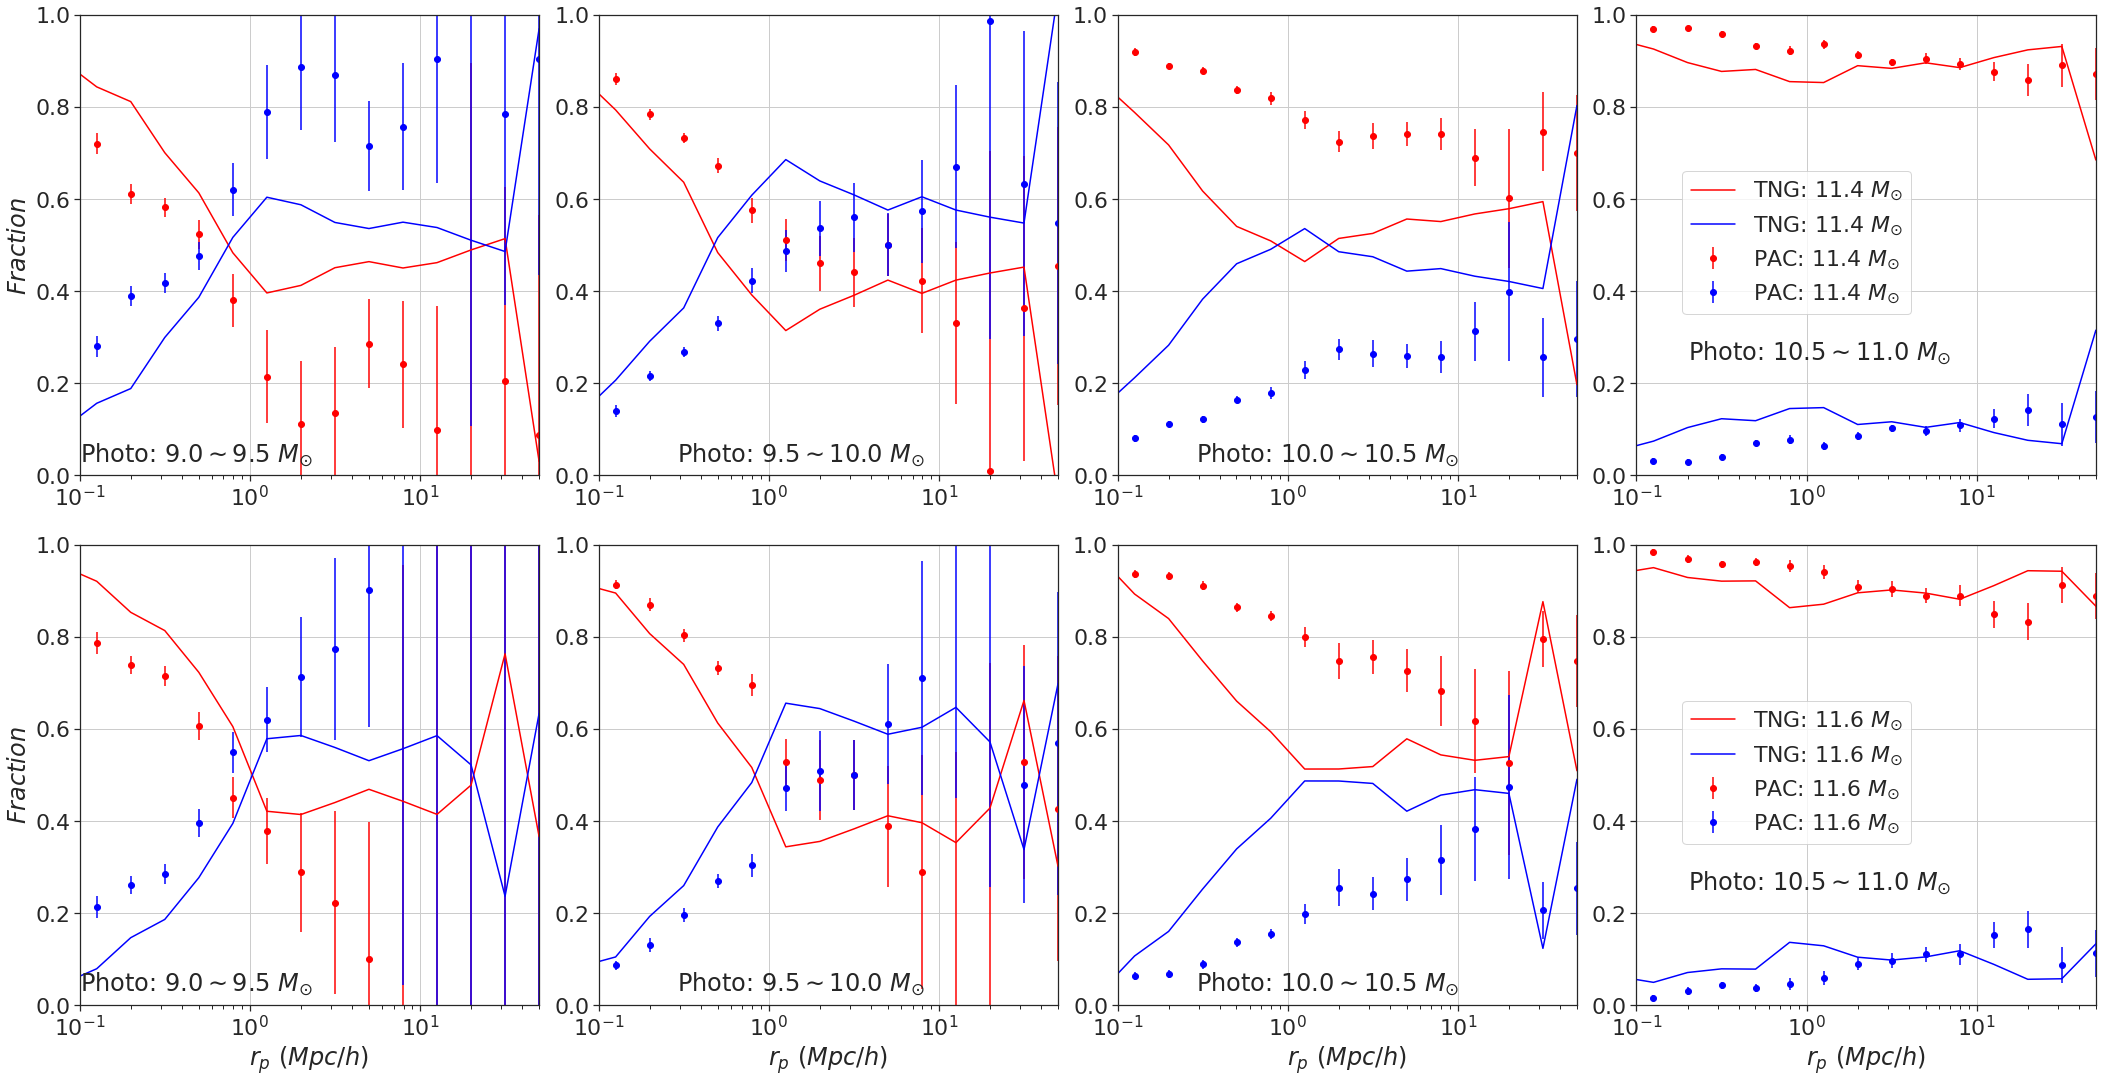

In [10]:
#plt.figure(figsize=(16,10))
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
ml = [9.0,9.5,10.0,10.5]
r = np.logspace(-2, 2, 21)
# r = r[4:]
r_need = 10**((np.log10(r[1:])+np.log10(r[:-1]))/2.0)

ms = [11.3,11.5] 
# off = [0.95,1,1.05]
fig, axs = plt.subplots(2,4,figsize=(32,16))
fig.subplots_adjust(top=0.95,
bottom=0.09,
left=0.085,
right=0.96,
hspace=0.15,
wspace=0.13)


k = 0
for i in range(len(ms)):
    for j in range(len(ml)):
        k = k+1
        plt.subplot(2,4,k)
#         red = np.load("./normal_fra_red_cor/%.1f_%.1f.npy" % (ms[i]+0.1,ml[j]))
#         plt.errorbar(red[0],red[1],red[2],fmt='*',color='orange')
#         blue = np.load("./normal_fra_blue_cor/%.1f_%.1f.npy" % (ms[i]+0.1,ml[j]))
#         plt.errorbar(blue[0],blue[1],blue[2],fmt='*',color='green')
#         plt.errorbar(r_need[4:],frac_3[i][j],frac_std_3[i][j],fmt='^',color='green')      
        TNG = np.load("/home/yunzheng/PAC_final/PAC/0_0.2/TNG/nwp/nwp_%.1f_%.1f.npy"%(ms[i],ml[j]))
        TNG_red = np.load("/home/yunzheng/PAC_final/PAC/0_0.2/TNG/color_cut_red/nwp_%.1f_%.1f.npy"%(ms[i],ml[j]))
        red_nor = TNG_red[0] / TNG[0]
        red_err = np.sqrt((TNG_red[1] / TNG[0])**2 + (TNG_red[0] / (TNG[0])**2 * TNG[1])**2)


        TNG_blue = np.load("/home/yunzheng/PAC_final/PAC/0_0.2/TNG/color_cut_blue/nwp_%.1f_%.1f.npy"%(ms[i],ml[j]))
        blue_nor = TNG_blue[0] / TNG[0]
        blue_err = np.sqrt((TNG_blue[1] / TNG[0])**2 + (TNG_blue[0] / (TNG[0])**2 * TNG[1])**2)



        plt.plot(r_need,red_nor,label = 'TNG: %.1f $M_{\odot}$'% (0.1+ms[i]),color='red')
#         plt.fill_between(r_need,red_nor-red_err,red_nor+red_err,color='red',alpha = 0.2)

        plt.plot(r_need,blue_nor,label = 'TNG: %.1f $M_{\odot}$'% (0.1+ms[i]),color='blue')
#         plt.fill_between(r_need,blue_nor-blue_err,blue_nor+blue_err,color='blue',alpha = 0.2)


    
        if j==0:
            red = np.load("./normal_fra_red_new_cor/%.1f_%.1f.npy" % (ms[i]+0.1,ml[j]))
            plt.errorbar(red[0],red[1],red[2],fmt='o',color='red',label='PAC:%.1f' % (ms[i]+0.1))

            blue = np.load("./normal_fra_blue_new_cor/%.1f_%.1f.npy" % (ms[i]+0.1,ml[j]))
            plt.errorbar(blue[0],blue[1],blue[2],fmt='o',color='blue',label='PAC:%.1f' % (ms[i]+0.1))
    #         data_all = np.load('./sdss_PAC/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
    #         data_all = np.delete(data_all,[-1,-2],1)
            plt.ylabel('$Fraction$')
            plt.text(0.1,0.03,'Photo: %.1f$\sim$%.1f $M_{\odot}$' % (ml[j],ml[j]+0.5))



        elif j==3:
            red = np.load("./normal_fra_red_cor/%.1f_%.1f.npy" % (ms[i]+0.1,ml[j]))
            plt.errorbar(red[0],red[1],red[2],fmt='o',color='red',label='PAC: %.1f $M_{\odot}$' % (ms[i]+0.1))

            blue = np.load("./normal_fra_blue_cor/%.1f_%.1f.npy" % (ms[i]+0.1,ml[j]))
            plt.errorbar(blue[0],blue[1],blue[2],fmt='o',color='blue',label='PAC: %.1f $M_{\odot}$' % (ms[i]+0.1))

            plt.legend(loc=(0.1,0.35))
            plt.text(0.2,0.25,'Photo: %.1f$\sim$%.1f $M_{\odot}$' % (ml[j],ml[j]+0.5))


        else:
            red = np.load("./normal_fra_red_cor/%.1f_%.1f.npy" % (ms[i]+0.1,ml[j]))
            plt.errorbar(red[0],red[1],red[2],fmt='o',color='red',label='PAC: %.1f' % (ms[i]+0.1))

            blue = np.load("./normal_fra_blue_cor/%.1f_%.1f.npy" % (ms[i]+0.1,ml[j]))
            plt.errorbar(blue[0],blue[1],blue[2],fmt='o',color='blue',label='PAC: %.1f' % (ms[i]+0.1))

            plt.text(0.29,0.03,'Photo: %.1f$\sim$%.1f $M_{\odot}$' % (ml[j],ml[j]+0.5))

        if i==1:
            plt.xlabel('$r_p\ (Mpc/h)$')
        plt.xscale('log')
#         plt.yscale('log')
        
        
#         plt.legend(loc='upper right')
        plt.ylim(0.0,1)
        plt.xlim(0.1,50)
        plt.grid()
        
        

# plt.suptitle("$normalized \  fraction$")
# plt.savefig("/home/yunzheng/PAC_newtry/picture/0_0.2/color_normal.pdf",dpi = 100)

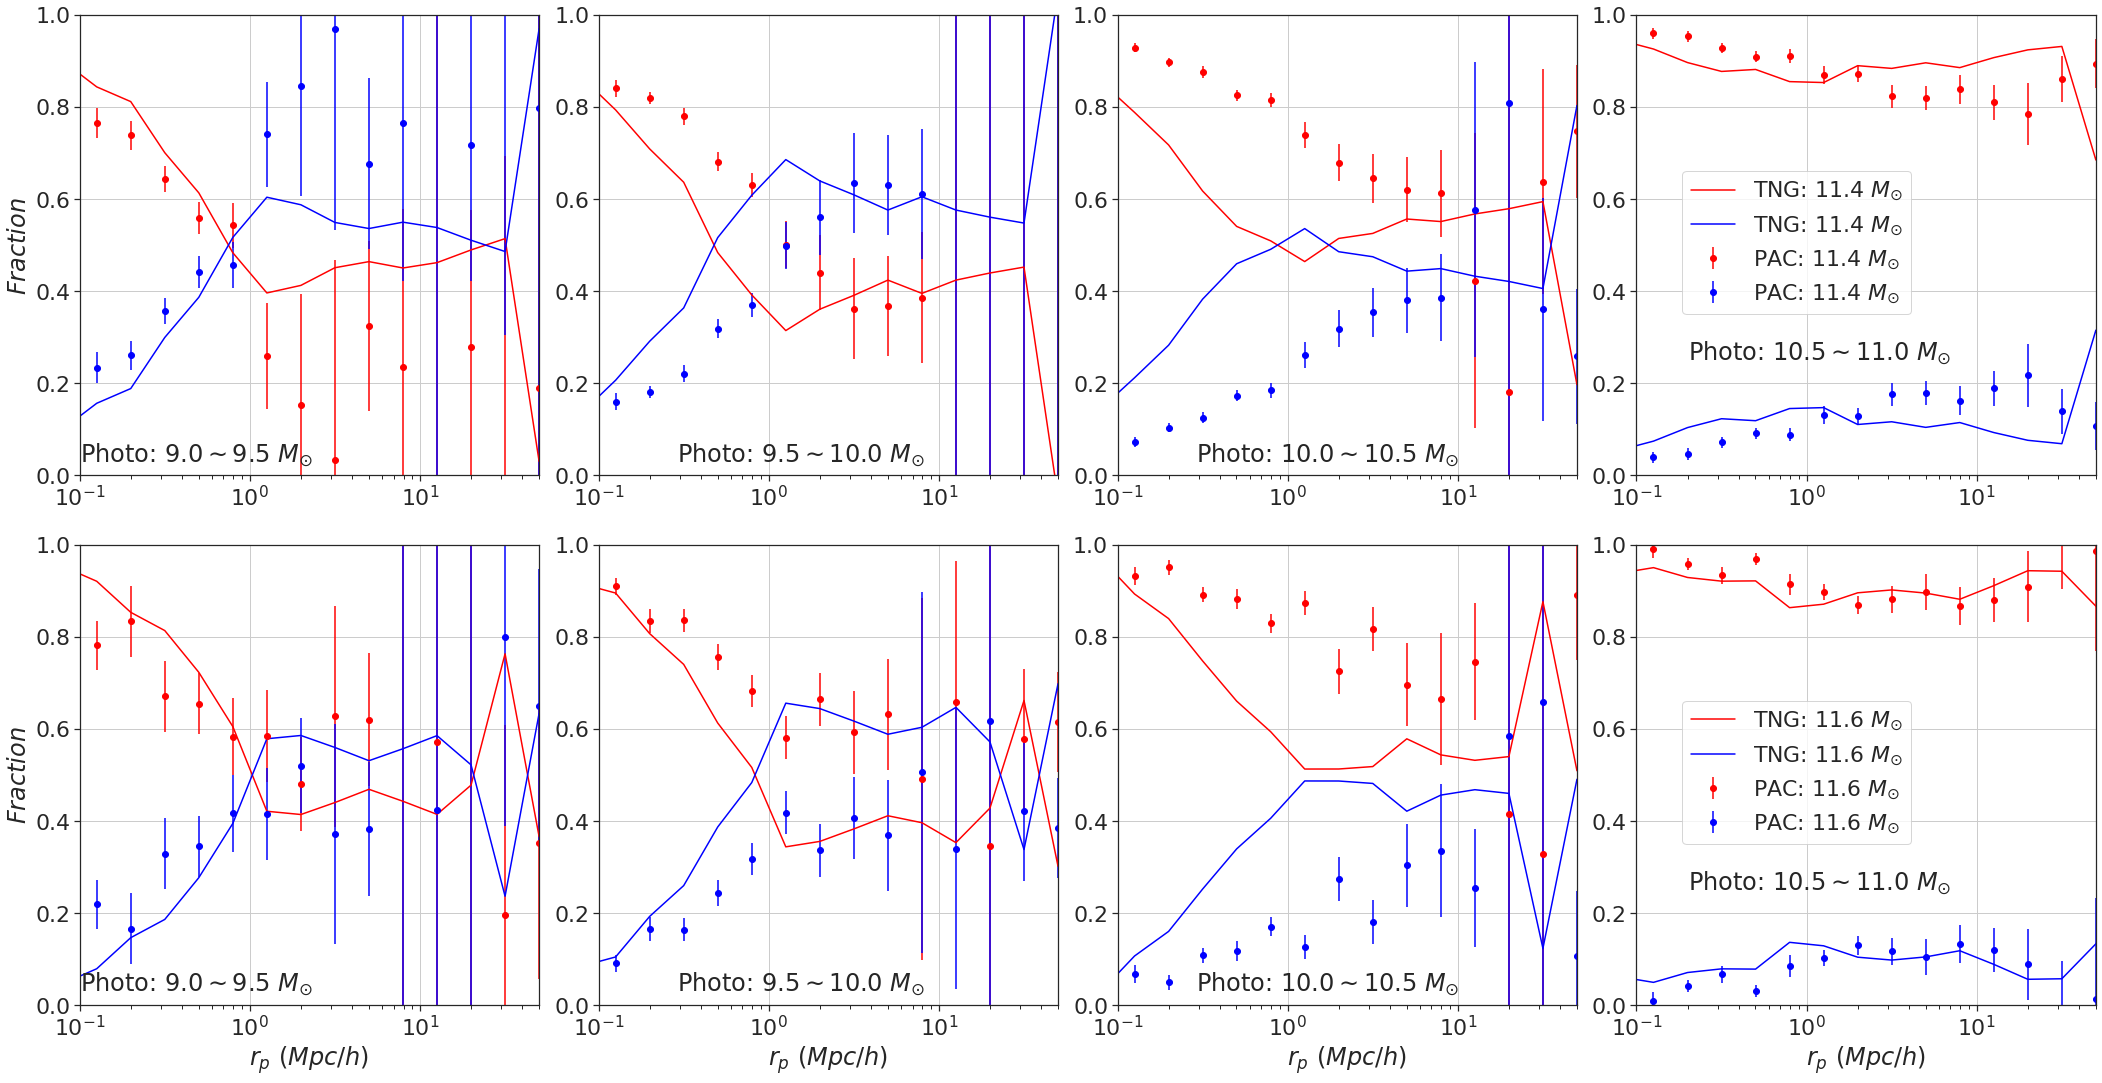

In [15]:
#plt.figure(figsize=(16,10))
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
ml = [9.0,9.5,10.0,10.5]
r = np.logspace(-2, 2, 21)
# r = r[4:]
r_need = 10**((np.log10(r[1:])+np.log10(r[:-1]))/2.0)

ms = [11.3,11.5] 
# off = [0.95,1,1.05]
fig, axs = plt.subplots(2,4,figsize=(32,16))
fig.subplots_adjust(top=0.95,
bottom=0.09,
left=0.085,
right=0.96,
hspace=0.15,
wspace=0.13)


k = 0
for i in range(len(ms)):
    for j in range(len(ml)):
        k = k+1
        plt.subplot(2,4,k)
#         red = np.load("./normal_fra_red_cor/%.1f_%.1f.npy" % (ms[i]+0.1,ml[j]))
#         plt.errorbar(red[0],red[1],red[2],fmt='*',color='orange')
#         blue = np.load("./normal_fra_blue_cor/%.1f_%.1f.npy" % (ms[i]+0.1,ml[j]))
#         plt.errorbar(blue[0],blue[1],blue[2],fmt='*',color='green')
#         plt.errorbar(r_need[4:],frac_3[i][j],frac_std_3[i][j],fmt='^',color='green')      
        TNG = np.load("/home/yunzheng/PAC_final/PAC/0_0.2/TNG/nwp/nwp_%.1f_%.1f.npy"%(ms[i],ml[j]))
        TNG_red = np.load("/home/yunzheng/PAC_final/PAC/0_0.2/TNG/color_cut_red/nwp_%.1f_%.1f.npy"%(ms[i],ml[j]))
        red_nor = TNG_red[0] / TNG[0]
        red_err = np.sqrt((TNG_red[1] / TNG[0])**2 + (TNG_red[0] / (TNG[0])**2 * TNG[1])**2)


        TNG_blue = np.load("/home/yunzheng/PAC_final/PAC/0_0.2/TNG/color_cut_blue/nwp_%.1f_%.1f.npy"%(ms[i],ml[j]))
        blue_nor = TNG_blue[0] / TNG[0]
        blue_err = np.sqrt((TNG_blue[1] / TNG[0])**2 + (TNG_blue[0] / (TNG[0])**2 * TNG[1])**2)



        plt.plot(r_need,red_nor,label = 'TNG: %.1f $M_{\odot}$'% (0.1+ms[i]),color='red')
#         plt.fill_between(r_need,red_nor-red_err,red_nor+red_err,color='red',alpha = 0.2)

        plt.plot(r_need,blue_nor,label = 'TNG: %.1f $M_{\odot}$'% (0.1+ms[i]),color='blue')
#         plt.fill_between(r_need,blue_nor-blue_err,blue_nor+blue_err,color='blue',alpha = 0.2)


    
        if j==0:
            red = np.load("./normal_fra_red_new_cor/%.1f_%.1f.npy" % (ms[i]+0.1,ml[j]))
            plt.errorbar(red[0],red[1],red[2],fmt='o',color='red',label='PAC:%.1f' % (ms[i]+0.1))

            blue = np.load("./normal_fra_blue_new_cor/%.1f_%.1f.npy" % (ms[i]+0.1,ml[j]))
            plt.errorbar(blue[0],blue[1],blue[2],fmt='o',color='blue',label='PAC:%.1f' % (ms[i]+0.1))
    #         data_all = np.load('./sdss_PAC/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
    #         data_all = np.delete(data_all,[-1,-2],1)
            plt.ylabel('$Fraction$')
            plt.text(0.1,0.03,'Photo: %.1f$\sim$%.1f $M_{\odot}$' % (ml[j],ml[j]+0.5))



        elif j==3:
            red = np.load("./normal_fra_red_cor/%.1f_%.1f.npy" % (ms[i]+0.1,ml[j]))
            plt.errorbar(red[0],red[1],red[2],fmt='o',color='red',label='PAC: %.1f $M_{\odot}$' % (ms[i]+0.1))

            blue = np.load("./normal_fra_blue_cor/%.1f_%.1f.npy" % (ms[i]+0.1,ml[j]))
            plt.errorbar(blue[0],blue[1],blue[2],fmt='o',color='blue',label='PAC: %.1f $M_{\odot}$' % (ms[i]+0.1))

            plt.legend(loc=(0.1,0.35))
            plt.text(0.2,0.25,'Photo: %.1f$\sim$%.1f $M_{\odot}$' % (ml[j],ml[j]+0.5))


        else:
            red = np.load("./normal_fra_red_cor/%.1f_%.1f.npy" % (ms[i]+0.1,ml[j]))
            plt.errorbar(red[0],red[1],red[2],fmt='o',color='red',label='PAC: %.1f' % (ms[i]+0.1))

            blue = np.load("./normal_fra_blue_cor/%.1f_%.1f.npy" % (ms[i]+0.1,ml[j]))
            plt.errorbar(blue[0],blue[1],blue[2],fmt='o',color='blue',label='PAC: %.1f' % (ms[i]+0.1))

            plt.text(0.29,0.03,'Photo: %.1f$\sim$%.1f $M_{\odot}$' % (ml[j],ml[j]+0.5))

        if i==1:
            plt.xlabel('$r_p\ (Mpc/h)$')
        plt.xscale('log')
#         plt.yscale('log')
        
        
#         plt.legend(loc='upper right')
        plt.ylim(0.0,1)
        plt.xlim(0.1,50)
        plt.grid()
        
        

# plt.suptitle("$normalized \  fraction$")
# plt.savefig("/home/yunzheng/PAC_final/picture/PAC/0_0.2/color_normal3.pdf",dpi = 100)

In [13]:
mass0 = np.concatenate((np.ones(16)*9.25,np.ones(16)*9.75,np.ones(16)*10.25,np.ones(16)*10.75))
mass0 = mass0.reshape(-1,16)

In [14]:
mass0

array([[ 9.25,  9.25,  9.25,  9.25,  9.25,  9.25,  9.25,  9.25,  9.25,
         9.25,  9.25,  9.25,  9.25,  9.25,  9.25,  9.25],
       [ 9.75,  9.75,  9.75,  9.75,  9.75,  9.75,  9.75,  9.75,  9.75,
         9.75,  9.75,  9.75,  9.75,  9.75,  9.75,  9.75],
       [10.25, 10.25, 10.25, 10.25, 10.25, 10.25, 10.25, 10.25, 10.25,
        10.25, 10.25, 10.25, 10.25, 10.25, 10.25, 10.25],
       [10.75, 10.75, 10.75, 10.75, 10.75, 10.75, 10.75, 10.75, 10.75,
        10.75, 10.75, 10.75, 10.75, 10.75, 10.75, 10.75]])

In [15]:
# rvir = np.array([643.4968999301032,788.7737148534878 ])/1000
rvir = 643.4968999301032/1000
# rvir = 788.7737148534878/1000

In [193]:
def func(X,a,b,c,d):
    r,m = X
    y = a*b**(-(m-9.25)/0.5) * (1-erf(r)) + c*m+d
    return y

In [212]:
def func(X,a,b,c,d):
    r,m = X
    y = (a*10**m+b) * (1-erf(r)) + c*m+d
    return y


In [16]:
def func(X,a,b,c,d):
    r,m = X
    y = (a*m+b) * (1-erf(r-rvir)) + c*m+d
    return y

/home/yunzheng/.local/anaconda/envs/mynumba/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/yunzheng/.local/anaconda/envs/mynumba/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/yunzheng/.local/anaconda/envs/mynumba/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/yunzheng/.local/anaconda/envs/mynumba/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/yunzheng/.local/anacon

The para: -1625.1869566271525 15033.313961036429 403.7902149097601 -3734.899375045065
The para: -320.99691062829305 3130.038938421235 -501.42156356948425 4889.230849787819
The para: 1281.5811900263852 -13136.033895660687 -66.52978811850207 682.5959535438299
The para: -829.1365383809128 8913.285054970915 -338.68505790409705 3641.7170997636226
The para: 246.0736960858434 -2275.9592915795324 351.93857261014244 -3255.0927707611304
The para: -25.894594374718682 252.68590121757742 434.564752888073 -4236.4500032648875
The para: 748.7126075826171 -7674.193448366335 448.14576613854376 -4592.715265121342
The para: 666.4296583739922 -7164.06646883759 -325.48269857415517 3499.831899765155


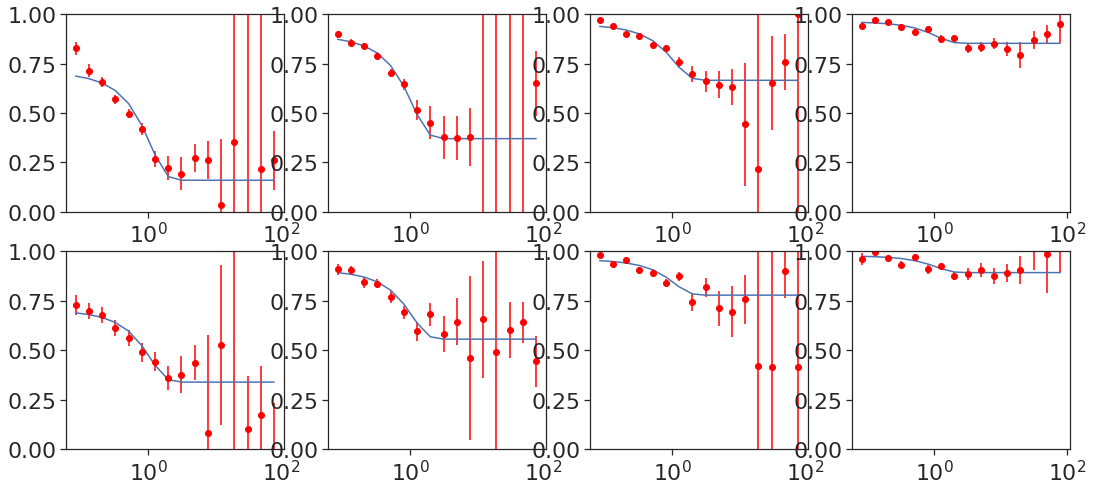

In [12]:
plt.figure(figsize=(18,8))

k = 0
for i in range(len(ms)):
    for j in range(len(ml)):
        k = k+1
        plt.subplot(2,4,k)
        red = np.load("./normal_fra_red_cor/%.1f_%.1f.npy" % (ms[i]+0.1,ml[j]))
        plt.errorbar(red[0],red[1],red[2],fmt='o',color='red',label='PAC: %.1f' % (ms[i]+0.1))

# blue = np.load("./normal_fra_blue_cor/%.1f_%.1f.npy" % (11.4,10.0))
# # plt.errorbar(blue[0],blue[1],blue[2],fmt='o',color='blue',label='PAC: %.1f' % (ms[i]+0.1))

        popt,pcov = curve_fit(func,(red[0],mass0[j]),red[1],sigma = red[2],p0=(5,1,1,1))
        print("The para:",*popt)
        plt.plot(red[0],func((red[0],mass0[j]),*popt))
        plt.xscale('log')
        plt.ylim(0.0,1)
#         plt.xlim(0.1,50)

In [210]:
data.shape

(1, 4, 3, 16)

The fitting result: [-0.20501151  2.2830121   0.4318976  -3.80048797]


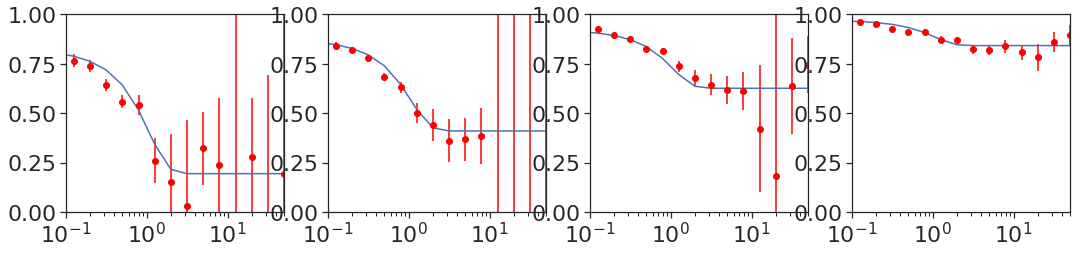

In [17]:
plt.figure(figsize=(18,8))

k = 0
data = np.zeros((len(ms)-1,len(ml),3,16))
for i in range(len(ms)-1):
    for j in range(len(ml)):
        k = k+1
        plt.subplot(2,4,k)
        if j==0:
            red = np.load("./normal_fra_red_new_cor/%.1f_%.1f.npy"% (ms[i]+0.1,ml[j]))
            data[i][j] = red
        else:
            red = np.load("./normal_fra_red_cor/%.1f_%.1f.npy"% (ms[i]+0.1,ml[j]))
            data[i][j] = red
#         red = np.load("./normal_fra_red_cor/%.1f_%.1f.npy" % (ms[i]+0.1,ml[j]))
# #         plt.errorbar(red[0],red[1],red[2],fmt='o',color='red',label='PAC: %.1f' % (ms[i]+0.1))
#         data[i][j] = red
# blue = np.load("./normal_fra_blue_cor/%.1f_%.1f.npy" % (11.4,10.0))
# # plt.errorbar(blue[0],blue[1],blue[2],fmt='o',color='blue',label='PAC: %.1f' % (ms[i]+0.1))


rtest = np.concatenate((data[0][::,0]))
datatest = np.concatenate((data[0][::,1]))
sigtest = np.concatenate((data[0][::,2]))
masstest = np.concatenate((mass0))
popt,pcov = curve_fit(func,(rtest,masstest),datatest,sigma = sigtest,p0=(-0.00357,1,1.0,1))
print("The fitting result:",popt)

k = 0
data = np.zeros((len(ms)-1,len(ml),3,16))
for i in range(len(ms)-1):
    for j in range(len(ml)):
        k = k+1
        plt.subplot(2,4,k)
        
        if j==0:
            red = np.load("./normal_fra_red_new_cor/%.1f_%.1f.npy"% (ms[i]+0.1,ml[j]))
            plt.errorbar(red[0],red[1],red[2],fmt='o',color='red',label='PAC: %.1f' % (ms[i]+0.1))


        else:
            red = np.load("./normal_fra_red_cor/%.1f_%.1f.npy" % (ms[i]+0.1,ml[j]))
            plt.errorbar(red[0],red[1],red[2],fmt='o',color='red',label='PAC: %.1f' % (ms[i]+0.1))


#         print("The para:",*popt)
        plt.plot(red[0],func((red[0],mass0[j]),*popt))
        plt.xscale('log')
        plt.ylim(0.0,1)
        plt.xlim(0.1,50)

The fitting result: [-0.284121    3.17659579  0.33087858 -2.68982893]


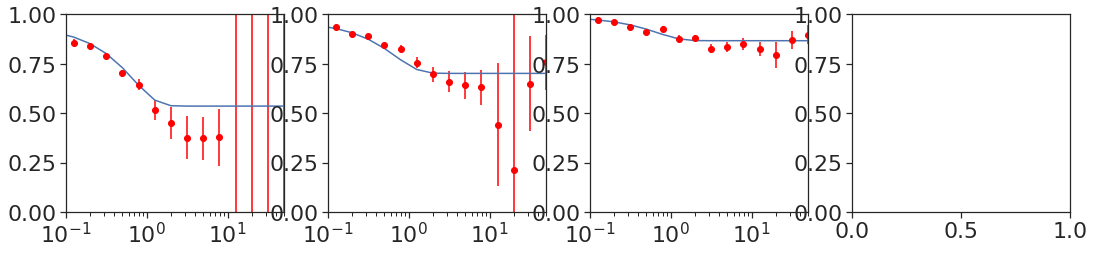

In [206]:
plt.figure(figsize=(18,8))

k = 0
data = np.zeros((len(ms)-1,len(ml),3,16))
for i in range(len(ms)-1):
    for j in range(len(ml)):
        k = k+1
        plt.subplot(2,4,k)
        red = np.load("./normal_fra_red_cor/%.1f_%.1f.npy" % (ms[i]+0.1,ml[j]))
#         plt.errorbar(red[0],red[1],red[2],fmt='o',color='red',label='PAC: %.1f' % (ms[i]+0.1))
        data[i][j] = red
# blue = np.load("./normal_fra_blue_cor/%.1f_%.1f.npy" % (11.4,10.0))
# # plt.errorbar(blue[0],blue[1],blue[2],fmt='o',color='blue',label='PAC: %.1f' % (ms[i]+0.1))


rtest = np.concatenate((data[0][::,0]))[16:]
datatest = np.concatenate((data[0][::,1]))[16:]
sigtest = np.concatenate((data[0][::,2]))[16:]
masstest = np.concatenate((mass0[1:]))
popt,pcov = curve_fit(func,(rtest,masstest),datatest,sigma = sigtest,p0=(-0.00357,1,1.0,1))
print("The fitting result:",popt)

k = 0
data = np.zeros((len(ms)-1,len(ml),3,16))
for i in range(len(ms)-1):
    for j in range(len(ml)):
        if j==0:
            continue
        k = k+1
        plt.subplot(2,4,k)
        red = np.load("./normal_fra_red_cor/%.1f_%.1f.npy" % (ms[i]+0.1,ml[j]))
        plt.errorbar(red[0],red[1],red[2],fmt='o',color='red',label='PAC: %.1f' % (ms[i]+0.1))


#         print("The para:",*popt)
        plt.plot(red[0],func((red[0],mass0[j]),*popt))
        plt.xscale('log')
        plt.ylim(0.0,1)
        plt.xlim(0.1,50)

The fitting result: [-0.12064374  1.35181372  0.30160071 -2.34996826]


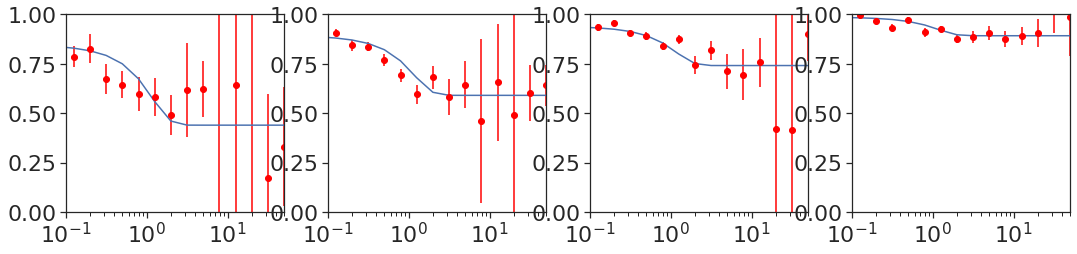

In [19]:
plt.figure(figsize=(18,8))

k = 0
data = np.zeros((len(ms)-1,len(ml),3,16))
for i in range(1,len(ms)):
    for j in range(len(ml)):
        k = k+1
        plt.subplot(2,4,k)
        if j==0:
            red = np.load("./normal_fra_red_new_cor/%.1f_%.1f.npy"% (ms[i]+0.1,ml[j]))
            data[i-1][j] = red
        else:
            red = np.load("./normal_fra_red_cor/%.1f_%.1f.npy"% (ms[i]+0.1,ml[j]))
            data[i-1][j] = red
# blue = np.load("./normal_fra_blue_cor/%.1f_%.1f.npy" % (11.4,10.0))
# # plt.errorbar(blue[0],blue[1],blue[2],fmt='o',color='blue',label='PAC: %.1f' % (ms[i]+0.1))


rtest = np.concatenate((data[0][::,0]))
datatest = np.concatenate((data[0][::,1]))
sigtest = np.concatenate((data[0][::,2]))
masstest = np.concatenate((mass0))
popt,pcov = curve_fit(func,(rtest,masstest),datatest,sigma = sigtest,p0=(-0.00357,1,1.0,1))
print("The fitting result:",popt)

k = 0
data = np.zeros((len(ms)-1,len(ml),3,16))
for i in range(1,len(ms)):
    for j in range(len(ml)):
        k = k+1
        plt.subplot(2,4,k)
        
        if j==0:
            red = np.load("./normal_fra_red_new_cor/%.1f_%.1f.npy"% (ms[i]+0.1,ml[j]))
            plt.errorbar(red[0],red[1],red[2],fmt='o',color='red',label='PAC: %.1f' % (ms[i]+0.1))


        else:
            red = np.load("./normal_fra_red_cor/%.1f_%.1f.npy" % (ms[i]+0.1,ml[j]))
            plt.errorbar(red[0],red[1],red[2],fmt='o',color='red',label='PAC: %.1f' % (ms[i]+0.1))


#         print("The para:",*popt)
        plt.plot(red[0],func((red[0],mass0[j]),*popt))
        plt.xscale('log')
        plt.ylim(0.0,1)
        plt.xlim(0.1,50)

The fitting result: [-0.21841161  2.45066387  0.31563321 -2.47902317]


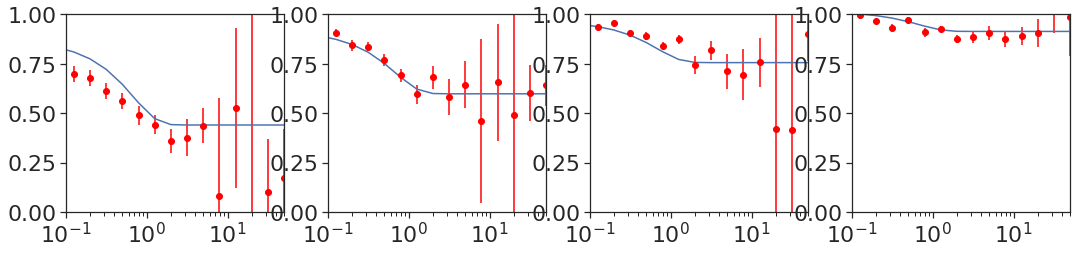

In [207]:
plt.figure(figsize=(18,8))

k = 0
data = np.zeros((len(ms)-1,len(ml),3,16))
for i in range(1,len(ms)):
    for j in range(len(ml)):
        k = k+1
        plt.subplot(2,4,k)
        red = np.load("./normal_fra_red_cor/%.1f_%.1f.npy" % (ms[i]+0.1,ml[j]))
#         plt.errorbar(red[0],red[1],red[2],fmt='o',color='red',label='PAC: %.1f' % (ms[i]+0.1))
        data[i-1][j] = red
# blue = np.load("./normal_fra_blue_cor/%.1f_%.1f.npy" % (11.4,10.0))
# # plt.errorbar(blue[0],blue[1],blue[2],fmt='o',color='blue',label='PAC: %.1f' % (ms[i]+0.1))


rtest = np.concatenate((data[0][::,0]))
datatest = np.concatenate((data[0][::,1]))
sigtest = np.concatenate((data[0][::,2]))
masstest = np.concatenate((mass0))
popt,pcov = curve_fit(func,(rtest,masstest),datatest,sigma = sigtest,p0=(-0.00357,1,1.0,1))
print("The fitting result:",popt)

k = 0
data = np.zeros((len(ms)-1,len(ml),3,16))
for i in range(1,len(ms)):
    for j in range(len(ml)):
        k = k+1
        plt.subplot(2,4,k)
        red = np.load("./normal_fra_red_cor/%.1f_%.1f.npy" % (ms[i]+0.1,ml[j]))
        plt.errorbar(red[0],red[1],red[2],fmt='o',color='red',label='PAC: %.1f' % (ms[i]+0.1))


#         print("The para:",*popt)
        plt.plot(red[0],func((red[0],mass0[j]),*popt))
        plt.xscale('log')
        plt.ylim(0.0,1)
        plt.xlim(0.1,50)

In [ ]:
def func_1(X,a,b,c):
    r,m = X
    if r>rvir:
        return 
    else:
        return 
    y = a*m * (erf(r-b)) + c
    return y